In [0]:
import numpy
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [10]:
dataset = pd.read_csv('train.csv')
dataset.fillna(dataset.mean(axis=0), inplace=True)
dataset.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,...,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,3.59025,-0.117558,0.558392,0.405572,8.0,0.430972,75751,0.2254,11.0,4.744703,-0.572244,0.49,5.0,1.842984,27.053679,1.0,-0.549725,0.803059,-0.925463,2.0,0.605593,-0.489492,0.799833,-1.209290,-0.329675,0.055275,-0.010770,0.000003,-0.000734,-0.000738,-0.000007,0.000423,0.000438,-0.000076,0.000645,-0.000006,0.000006,4.886832e-07,-0.000156,...,-0.000842,-0.001390,0.000148,2.846942e-04,0.001254,-0.000130,0.000126,0.000978,0.000151,0.002642,-0.000017,0.000140,0.000015,-0.000011,0.001683,-0.000286,0.000010,0.000152,0.000579,-1.501973e-04,0.000822,0.001392,0.000292,0.000002,0.001133,-0.000134,0.001539,-0.000142,0.000861,0.000544,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,3.59025,-0.117558,0.558392,0.405572,3.0,0.388896,17369,0.0166,13.0,4.744703,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987,-0.000487,0.000475,0.000002,-0.000002,-0.000523,-0.000255,-0.000008,0.000048,-0.000312,-0.000742,-9.027256e-06,-0.000248,...,-0.000104,0.000555,0.000259,2.559339e-05,0.000004,-0.000255,0.000263,0.000250,0.000104,0.000119,-0.000483,0.000128,0.000886,0.000003,0.000148,0.000623,0.000507,-0.000742,-0.000514,8.881545e-07,0.000090,-0.000361,-0.000738,-0.000502,0.000497,0.000256,-0.000256,-0.000005,-0.000497,0.000240,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,3,3.59025,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,5.000000,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.0,0.605593,0.389061,1.728096,-1.798090,-1.019370,0.003077,0.006181,-0.000782,-0.000402,0.000807,0.000400,0.000656,-0.001177,0.001198,0.000610,-0.001031,0.000647,-9.295448e-04,-0.000543,...,-0.000003,-0.000102,-0.000292,5.032658e-04,-0.000126,-0.000135,0.000238,-0.000106,-0.000137,-0.000419,-0.000379,0.000013,0.000001,-0.000009,-0.000283,-0.000526,0.000247,-0.000134,0.000675,1.136847e-04,0.000234,-0.000506,-0.000007,-0.000249,0.000119,0.000277,0.000656,0.000127,0.000255,0.000278,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,4,3.59025,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,5.000000,-2.138383,0.00,6.0,1.588524,1.801865,1.0,-1.131213,1.565036,-1.205438,7.0,1.148738,-2.440799,1.551425,-1.788725,-0.329675,0.000984,0.014106,0.000277,-0.000088,-0.000199,-0.000301,0.000711,-0.000431,-0.000144,0.000340,-0.000639,0.000420,1.449000e-04,-0.000130,...,0.000120,-0.000119,0.000285,-1.020028e-07,0.000285,-0.000350,0.000214,-0.000703,0.000153,-0.000286,0.000136,-0.000579,-0.000139,-0.000005,-0.000009,0.000010,0.000290,-0.000068,-0.000352,2.739541e-04,-0.000292,0.000446,0.000288,0.000001,0.000304,-0.000027,0.000371,-0.000055,-0.000161,-0.000155,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,5,6.00000,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,4.000000,-4.795565,0.97,5.0,0.842102,9.198895,1.0,6.317498,-3.208872,-1.102189,7.0,3.381040,1.732708,1.965189,-5.993092,3.219820,-0.018224,0.011065,-0.001232,0.000002,-0.001205,-0.000021,0.000005,0.000623,-0.001843,0.000005,0.001226,0.001213,-2.428211e-0

In [0]:
#Splitting the dataset into X and Y, ie input and output values
X_original = dataset.iloc[:,0:27]
Y_original = dataset.iloc[:,85]

In [12]:
X_original.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo
0,1,3.59025,-0.117558,0.558392,0.405572,8.0,0.430972,75751,0.2254,11.0,4.744703,-0.572244,0.49,5.0,1.842984,27.053679,1.0,-0.549725,0.803059,-0.925463,2.0,0.605593,-0.489492,0.799833,-1.209290,-0.329675,0.055275
1,2,3.59025,-0.117558,0.558392,0.405572,3.0,0.388896,17369,0.0166,13.0,4.744703,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748
2,3,3.59025,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,5.000000,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.0,0.605593,0.389061,1.728096,-1.798090,-1.019370,0.003077
3,4,3.59025,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,5.000000,-2.138383,0.00,6.0,1.588524,1.801865,1.0,-1.131213,1.565036,-1.205438,7.0,1.148738,-2.440799,1.551425,-1.788725,-0.329675,0.000984
4,5,6.00000,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,4.000000,-4.795565,0.97,5.0,0.842102,9.198895,1.0,6.317498,-3.208872,-1.102189,7.0,3.381040,1.732708,1.965189,-5.993092,3.219820,-0.018224


In [13]:
X_original.shape

(40000, 27)

In [14]:
Y_original.head()

0   -0.001152
1   -0.000180
2   -0.000284
3   -0.000076
4    0.000020
Name: Ret_59, dtype: float64

In [15]:
Y_original.shape

(40000,)

In [0]:
#Normalizing X_original to X_scaled
normalize_X = MinMaxScaler()
normalize_X.fit(X_original)
X_scaled=normalize_X.transform(X_original)

In [17]:
#Model 1: Sequential
model = Sequential()
model.add(Dense(12, input_dim=27, kernel_initializer='normal'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                336       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [19]:
result = model.fit(X_scaled, Y_original,epochs=50, batch_size=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
40000/40000 [==============================] - 4s 97us/step - loss: 2.7156e-05 - mean_squared_error: 2.7156e-05 - mean_absolute_error: 0.0021
Epoch 2/50
40000/40000 [==============================] - 4s 91us/step - loss: 2.0570e-06 - mean_squared_error: 2.0570e-06 - mean_absolute_error: 0.0010
Epoch 3/50
40000/40000 [==============================] - 4s 92us/step - loss: 1.6523e-06 - mean_squared_error: 1.6523e-06 - mean_absolute_error: 9.1653e-04
Epoch 4/50
40000/40000 [==============================] - 4s 91us/step - loss: 1.7012e-06 - mean_squared_error: 1.7012e-06 - mean_absolute_error: 8.9021e-04
Epoch 5/50
40000/40000 [==============================] - 4s 92us/step - loss: 1.6529e-06 - mean_squared_error: 1.6529e-06 - mean_absolute_error: 8.9587e-04
Epoch 6/50
40000/40000 [==============================] - 4s 94us/step - loss: 1.6528e-06 - mean_squared_error: 1.6528e-06 - mean_absolute_error: 8.8696e-04
Epoch 7/50
40000/4

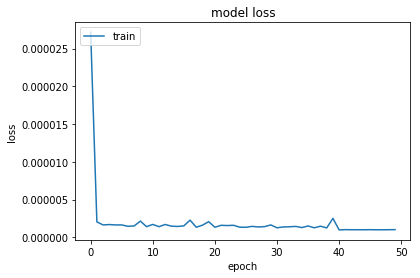

In [20]:
plt.plot(result.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [0]:
testdata = pd.read_csv('test_2.csv')
testdata.fillna(testdata.mean(axis=0), inplace=True)

In [0]:
#Splitting the test data and normalizing
X_test = testdata.iloc[:,0:27] 
Y_test = testdata.iloc[:,85]

normalize_X.fit(X_test)
X_scaled_test =normalize_X.transform(X_test)

In [0]:
Ynew = model.predict(X_scaled_test)

In [24]:
X_scaled_test

array([[0.00000000e+00, 0.00000000e+00, 6.37679216e-01, ...,
        7.83682410e-01, 2.48052986e-01, 4.64848302e-01],
       [1.07627566e-05, 2.71755589e-01, 4.41862324e-01, ...,
        7.13381825e-01, 1.99226110e-01, 4.89662857e-01],
       [2.15255131e-05, 2.71755589e-01, 3.78082324e-01, ...,
        6.88014797e-01, 2.66320968e-01, 4.41931083e-01],
       ...,
       [9.99978474e-01, 2.71755589e-01, 4.37891431e-01, ...,
        8.29903162e-01, 2.07895939e-01, 4.88644410e-01],
       [9.99989237e-01, 1.11111111e-01, 4.41862324e-01, ...,
        6.89469275e-01, 8.98537291e-02, 4.83721385e-01],
       [1.00000000e+00, 2.71755589e-01, 5.07609473e-01, ...,
        4.98240048e-01, 1.07168052e-01, 4.48951065e-01]])

In [25]:
X_scaled_test.shape

(92914, 27)

In [26]:
Ynew

array([[-0.00034478],
       [-0.00034478],
       [-0.00034478],
       ...,
       [-0.00034478],
       [-0.00034478],
       [-0.00034478]], dtype=float32)

In [27]:
Ynew.shape

(92914, 1)

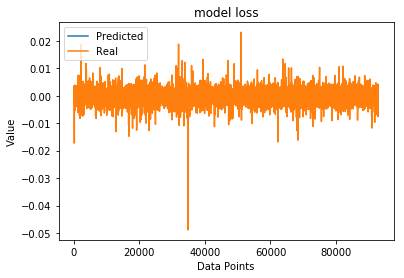

array([[-0.00034478],
       [-0.00034478],
       [-0.00034478],
       ...,
       [-0.00034478],
       [-0.00034478],
       [-0.00034478]], dtype=float32)

In [28]:
plt.plot(Ynew)
plt.plot(Y_test)
plt.title('model loss')
plt.ylabel('Value')
plt.xlabel('Data Points')
plt.legend(['Predicted','Real'], loc='upper left')
plt.show()
Ynew


In [0]:
#Model 2:LSTM with the original data
X_scaled = numpy.reshape(X_scaled, (X_scaled.shape[0], X_scaled.shape[1], 1))

In [0]:
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [31]:
model = Sequential()

model.add(LSTM(units = 10, return_sequences = True, input_shape = (X_scaled.shape[1], 1)))
model.add(Dropout(0.025))

model.add(LSTM(units = 10, return_sequences = True))
model.add(Dropout(0.025))

model.add(LSTM(units = 10, return_sequences = True))
model.add(Dropout(0.025))

model.add(LSTM(units = 10))
model.add(Dropout(0.025))

model.add(Dense(units = 1))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error' ,metrics = ['accuracy'])

In [33]:
model.fit(X_scaled, Y_original, epochs = 5, batch_size = 16)


Epoch 1/5
40000/40000 [==============================] - 125s 3ms/step - loss: 3.9338e-06 - acc: 0.0060
Epoch 2/5
40000/40000 [==============================] - 121s 3ms/step - loss: 1.1886e-06 - acc: 0.0060
Epoch 3/5
40000/40000 [==============================] - 119s 3ms/step - loss: 1.0941e-06 - acc: 0.0060
Epoch 4/5
40000/40000 [==============================] - 124s 3ms/step - loss: 1.0623e-06 - acc: 0.0060
Epoch 5/5
40000/40000 [==============================] - 119s 3ms/step - loss: 1.0156e-06 - acc: 0.0060


AttributeError: ignored

In [0]:
X_scaled_test = numpy.reshape(X_scaled_test, (X_scaled_test.shape[0], X_scaled_test.shape[1], 1))
predicted_stock_price = model.predict(X_scaled_test)

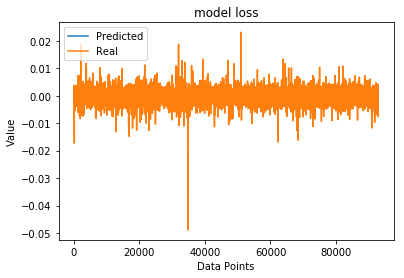

In [35]:
plt.plot(predicted_stock_price)
plt.plot(Y_test)
plt.title('model loss')
plt.ylabel('Value')
plt.xlabel('Data Points')
plt.legend(['Predicted','Real'], loc='upper left')
plt.show()


In [41]:
#Model 3 uses modtified data: returns relative to day 1 instead of thr previous day

#Modifying one column:
dataframe = pd.DataFrame({"Ret_2": numpy.random.randn(898), "Ret_3": numpy.random.randn(898)}) 
dataframe['Ret_3new'] = dataframe['Ret_2'] + dataframe['Ret_3']
dataframe.head()

,Ret_2,Ret_3,Ret_3new
0,0.239972,0.684274,0.924247
1,2.197689,0.265870,2.463558
2,-1.935293,0.268622,-1.666671
3,0.230908,0.271227,0.502135
4,-0.779542,0.496503,-0.283039


In [37]:
cols = dataset.columns
index = cols[27:205]
index #the columns that are used TO modify

Index(['Ret_MinusOne', 'Ret_2', 'Ret_3', 'Ret_4', 'Ret_5', 'Ret_6', 'Ret_7',
       'Ret_8', 'Ret_9', 'Ret_10',
       ...
       'Ret_169', 'Ret_170', 'Ret_171', 'Ret_172', 'Ret_173', 'Ret_174',
       'Ret_175', 'Ret_176', 'Ret_177', 'Ret_178'],
      dtype='object', length=178)

In [38]:
returns = cols[28:206]
returns #the columns that are to be modified

Index(['Ret_2', 'Ret_3', 'Ret_4', 'Ret_5', 'Ret_6', 'Ret_7', 'Ret_8', 'Ret_9',
       'Ret_10', 'Ret_11',
       ...
       'Ret_170', 'Ret_171', 'Ret_172', 'Ret_173', 'Ret_174', 'Ret_175',
       'Ret_176', 'Ret_177', 'Ret_178', 'Ret_179'],
      dtype='object', length=178)

In [0]:
for i in range(118):
  dataset[returns[i]] = dataset[returns[i]] +dataset[index[i]]

In [40]:
#modified dataset
dataset.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_3,Ret_4,Ret_5,Ret_6,Ret_7,Ret_8,Ret_9,Ret_10,Ret_11,Ret_12,Ret_13,...,Ret_145,Ret_146,Ret_147,Ret_148,Ret_149,Ret_150,Ret_151,Ret_152,Ret_153,Ret_154,Ret_155,Ret_156,Ret_157,Ret_158,Ret_159,Ret_160,Ret_161,Ret_162,Ret_163,Ret_164,Ret_165,Ret_166,Ret_167,Ret_168,Ret_169,Ret_170,Ret_171,Ret_172,Ret_173,Ret_174,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,3.59025,-0.117558,0.558392,0.405572,8.0,0.430972,75751,0.2254,11.0,4.744703,-0.572244,0.49,5.0,1.842984,27.053679,1.0,-0.549725,0.803059,-0.925463,2.0,0.605593,-0.489492,0.799833,-1.209290,-0.329675,0.055275,-0.010770,-0.010767,-0.011501,-0.012239,-0.012246,-0.011822,-0.011385,-0.011461,-0.010816,-0.010822,-0.010816,-0.010816,-0.010972,...,-0.000842,-0.001390,0.000148,2.846942e-04,0.001254,-0.000130,0.000126,0.000978,0.000151,0.002642,-0.000017,0.000140,0.000015,-0.000011,0.001683,-0.000286,0.000010,0.000152,0.000579,-1.501973e-04,0.000822,0.001392,0.000292,0.000002,0.001133,-0.000134,0.001539,-0.000142,0.000861,0.000544,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,3.59025,-0.117558,0.558392,0.405572,3.0,0.388896,17369,0.0166,13.0,4.744703,-0.409923,0.71,9.0,1.577586,9.546915,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987,0.002500,0.002975,0.002976,0.002975,0.002451,0.002196,0.002188,0.002236,0.001924,0.001182,0.001173,0.000926,...,-0.000104,0.000555,0.000259,2.559339e-05,0.000004,-0.000255,0.000263,0.000250,0.000104,0.000119,-0.000483,0.000128,0.000886,0.000003,0.000148,0.000623,0.000507,-0.000742,-0.000514,8.881545e-07,0.000090,-0.000361,-0.000738,-0.000502,0.000497,0.000256,-0.000256,-0.000005,-0.000497,0.000240,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,3,3.59025,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,5.000000,-0.473024,0.03,6.0,1.871160,9.647559,1.0,-1.132426,1.799813,-1.603488,3.0,0.605593,0.389061,1.728096,-1.798090,-1.019370,0.003077,0.006181,0.005399,0.004997,0.005804,0.006204,0.006860,0.005683,0.006881,0.007491,0.006460,0.007107,0.006178,0.005634,...,-0.000003,-0.000102,-0.000292,5.032658e-04,-0.000126,-0.000135,0.000238,-0.000106,-0.000137,-0.000419,-0.000379,0.000013,0.000001,-0.000009,-0.000283,-0.000526,0.000247,-0.000134,0.000675,1.136847e-04,0.000234,-0.000506,-0.000007,-0.000249,0.000119,0.000277,0.000656,0.000127,0.000255,0.000278,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,4,3.59025,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,5.000000,-2.138383,0.00,6.0,1.588524,1.801865,1.0,-1.131213,1.565036,-1.205438,7.0,1.148738,-2.440799,1.551425,-1.788725,-0.329675,0.000984,0.014106,0.014383,0.014295,0.014096,0.013795,0.014506,0.014074,0.013931,0.014271,0.013632,0.014052,0.014196,0.014066,...,0.000120,-0.000119,0.000285,-1.020028e-07,0.000285,-0.000350,0.000214,-0.000703,0.000153,-0.000286,0.000136,-0.000579,-0.000139,-0.000005,-0.000009,0.000010,0.000290,-0.000068,-0.000352,2.739541e-04,-0.000292,0.000446,0.000288,0.000001,0.000304,-0.000027,0.000371,-0.000055,-0.000161,-0.000155,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,5,6.00000,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,4.000000,-4.795565,0.97,5.0,0.842102,9.198895,1.0,6.317498,-3.208872,-1.102189,7.0,3.381040,1.732708,1.965189,-5.993092,3.219820,-0.018224,0.011065,0.009833,0.009835,0.008630,0.008609,0.008614,0.009237,0.007394,0.007399,0.008625,0.009838,0.007410,0.008383,...,-0.000979,0.000978,-0.0000

In [0]:
#Splitting the dataset into X and Y, ie input and output values
X_original = dataset.iloc[:,0:27]
Y_original = dataset.iloc[:,85]

#Normalizing
normalize_X.fit(X_original)
X_scaled =normalize_X.transform(X_original)

#reshaping
X_scaled = numpy.reshape(X_scaled, (X_scaled.shape[0], X_scaled.shape[1], 1))

In [0]:
model = Sequential()

model.add(LSTM(units = 10, return_sequences = True, input_shape = (X_scaled.shape[1], 1)))
model.add(Dropout(0.025))

model.add(LSTM(units = 10, return_sequences = True))
model.add(Dropout(0.025))

model.add(LSTM(units = 10, return_sequences = True))
model.add(Dropout(0.025))

model.add(LSTM(units = 10))
model.add(Dropout(0.025))

model.add(Dense(units = 1))


In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error' ,metrics = ['accuracy'])

In [45]:
model.fit(X_scaled, Y_original, epochs = 5, batch_size = 16)

X_scaled_test = numpy.reshape(X_scaled_test, (X_scaled_test.shape[0], X_scaled_test.shape[1], 1))
predicted_stock_price1 = model.predict(X_scaled_test)


Epoch 1/5
40000/40000 [==============================] - 125s 3ms/step - loss: 0.0010 - acc: 0.0000e+00
Epoch 2/5
40000/40000 [==============================] - 120s 3ms/step - loss: 0.0010 - acc: 0.0000e+00
Epoch 3/5
40000/40000 [==============================] - 120s 3ms/step - loss: 0.0010 - acc: 0.0000e+00
Epoch 4/5
40000/40000 [==============================] - 119s 3ms/step - loss: 0.0010 - acc: 0.0000e+00
Epoch 5/5
40000/40000 [==============================] - 117s 3ms/step - loss: 0.0010 - acc: 0.0000e+00


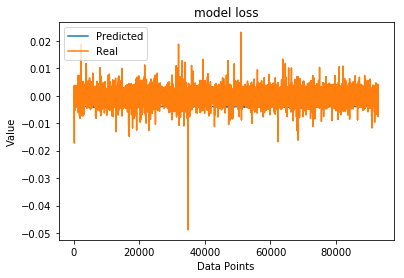

In [46]:
plt.plot(predicted_stock_price1)
plt.plot(Y_test)
plt.title('model loss')
plt.ylabel('Value')
plt.xlabel('Data Points')
plt.legend(['Predicted','Real'], loc='upper left')
plt.show()


In [0]:
rows = zip(Y_test, Ynew, predicted_stock_price, predicted_stock_price1)
import csv
with open('submission.csv',"w") as f:
  writer = csv.writer(f)
  writer.writerow(("Actual Value", "Sequential Predicted Value","LSTM Predicted Value","Relative LSTM Predicted Value"))
  for row in rows:
    writer.writerow(row)
submission = pd.read_csv('submission.csv')

In [48]:
submission

,Actual Value,Sequential Predicted Value,LSTM Predicted Value,Relative LSTM Predicted Value
0,3.868409e-04,[-0.00034478],[-0.00011869],[-0.00394119]
1,-4.494642e-04,[-0.00034478],[-0.00011919],[-0.00394368]
2,-8.718654e-06,[-0.00034478],[-0.00011872],[-0.00394785]
3,-4.872371e-04,[-0.00034478],[-0.00011971],[-0.00394695]
4,2.453421e-04,[-0.00034478],[-0.00012113],[-0.00395041]
5,5.166450e-06,[-0.00034478],[-0.00012155],[-0.00394056]
6,1.670945e-04,[-0.00034478],[-0.00011818],[-0.00394868]
7,3.951321e-04,[-0.00034478],[-0.00011735],[-0.00394853]
8,-1.347198e-05,[-0.00034478],[-0.000118],[-0.00394792]
9,2.279946e-04,[-0.00034478],[-0.00011855],[-0.00395049]
